# CMPE-259 Transformer Homework

## Professor Jorjeta Jetcheva, T.A. Hardy Leung

### Copyright 2023. All Right Reserved

Welcome to the transformer assignment! This assignment is made of four parts. Part I, II, III are tutorials on tensors, PyTorch, and transformer. Part IV is the actual coding. You only need to write code for Part IV.

The purpose of this assignment is to allow you to get as proficient with the transformer architecture as possible, starting only with decent Python coding skills and a basic understanding of deep learning at a higher level. You probably have _used_ or _adapted_ Keras or PyTorch codes in previous class projects starting with sample code, but it is not a requirement that you have _written_ your own PyTorch code.

You will implement the transformer model on PyTorch almost from scratch, with a minimum amount of external dependencies other than the PyTorch framework and some pre-built modules. Since we are learning about natural language processing, you would have some more idea about embedding and the concept of auto-regressive next-token prediction. You need have a high-level understanding of how transformer works. If not, it is worth your time reading the seminal paper on transformer, "*Attention is All You Need*" by Vaswani et al. https://arxiv.org/pdf/1706.03762.pdf

Hopefully, by the end of this transformer assignment, you will have developed quite a bit of confidence and ability as a professional deep learning practioner or researcher, instead of getting stuck at copying or adapting others' code.

It is strongly advised that you work on this assignment instead of looking up existing transformer implementation -- yes there are existing code out there, though some are very complicated. In fact, if you are not careful, you may end up spending even more time looking at existing code, and at the same time you rob yourself of a great learning opportunity.

Part I and II will get you familiar with the basics of tensors and PyTorch. Don't skip it even if you think you know the materials. Some of them are quite advanced and necessary for transformer implementation.

Part III talks about the mechanics of the transformer, mostly from an implementation perspective.

You don't need to submit anything for Parts I, II, and III.

Part IV is where the actual coding is. Search for the word `FIXME`, and make the appropriate changes. Part IV is further divided into many parts, as we will work on the building blocks towards the end-game of writing a fully functional transformer module. You'll be given instructions along the way. Verification functions are provided so that you know you have implemented each part correctly.

Let's go!

# [Tutorial] Part 1 -- Basic PyTorch tensors

In deep learning, we depend heavily on optimized concurrent tensor manipulation instead of iterative algorithms in traditional programming. Here we will first guide you through a sequence of PyTorch tensor manipulation that will be needed. Note that tensors are just generalization of matrices from 2-dimensional to `N`-dimensional in layman's term. It is extremely important that you can manipulate tensors at ease.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np
from tqdm import tqdm

In [2]:
torch.manual_seed(42)  # this is to ensure deterministic behavior

## 1.1 Create a Tensor

In [3]:
t357 = torch.zeros(3, 5, 7)
t357

tensor([[[0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0.]]])

## 1.2 Get the Shape of a Tensor

You must be familiar with the terminology of PyTorch tensors as it could be ambiguous otherwise. A tensor is a multi-dimensional object, and the list of dimensions of a tensor is called its _shape_, which is an attribute of a tensor. The length of the shape is equal to the number of dimensions of the tensor. Each element in the shape corresponds to a dimension. In the above example, the shape of `t357` is `[3, 5, 7]`. The tensor has three dimensions. The first dimension has 3 elements, the second dimension has 5, and the third and last dimension has 7.

Note that, under Python convention, `list[-1]` is equivalent to `list[N - 1]`, where `N` is the size of the list. This indexing convention allows you to access the last element of the list without knowing the size of the list (of course, as long as the list has at least one element). Similarly, `list[-2]` is equivalent to `list[N - 2]`.

In [4]:
t357.shape

torch.Size([3, 5, 7])

In [5]:
print(f'dim #0 = {t357.shape[0]}')
print(f'dim #1 = {t357.shape[1]}')
print(f'dim #2 = {t357.shape[2]}')
print(f'dim #last = {t357.shape[-1]}')
print(f'number of dimensions = {len(t357.shape)}')

dim #0 = 3
dim #1 = 5
dim #2 = 7
dim #last = 7
number of dimensions = 3


## 1.3 Create a Range (as a 1D tensor)

Note that when you create a tensor, sometimes you may need to explicitly specify the type. In the following examples, we have two tensors, one created as a tensor of long integers (by default), and the other as a tensor of floats.

In [6]:
r60 = torch.arange(0, 60)
print(f'r60 = {r60}')
print()
print(f'r60.shape = {r60.shape}')
print('----------------------------------------------------------------')

r60f = torch.arange(0, 60, dtype=torch.float)
print(f'r60f = {r60f}')
print()
print(f'r60f.shape = {r60f.shape}')

r60 = tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59])

r60.shape = torch.Size([60])
----------------------------------------------------------------
r60f = tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59.])

r60f.shape = torch.Size([60])


## 1.4(a) Reshape a tensor with reshape()

Now let's talk about reshaping a tensor. This requires some explanation. Even though a tensor can have multiple dimensions, you can think of the underlying data being stored as one logically contiguous blob of data (though not necessarily physically), with indexing based on the shape. Those with C or C++ experience shall understand this well). As such, it makes sense that you can look at the same tensor with different "views" of the same data.

It may be confusing at first when you look at the indices, though it is helpful to think of it as a hierachical grouping, similar to how a physical address is a hierarchy fully specified by state, city, street, and number. In the example below, we simply group the numbers into a 3-level hierarchy -- we have 3 groups of 4 groups of 5 numbers.

Another way to look at it is that the full index is a "badge" for the purpose of grouping and ordering. You can compare two badges lexicographically. e.g. index `[1,2,4]` < index `[1,3,2]`. With this understanding, reshaping a tensor does not change the lexicographical ordering of the underlying elements.

In [7]:
r345 = r60.reshape(3, 4, 5)
print(f'r345 = {r345}')
print()
print(f'r345.shape = {r345.shape}')

r345 = tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]])

r345.shape = torch.Size([3, 4, 5])


In [8]:
r2325 = r345.reshape(2, 3, 2, 5)
print(f'r2325 = {r2325}')
print()
print(r2325.shape)

r2325 = tensor([[[[ 0,  1,  2,  3,  4],
          [ 5,  6,  7,  8,  9]],

         [[10, 11, 12, 13, 14],
          [15, 16, 17, 18, 19]],

         [[20, 21, 22, 23, 24],
          [25, 26, 27, 28, 29]]],


        [[[30, 31, 32, 33, 34],
          [35, 36, 37, 38, 39]],

         [[40, 41, 42, 43, 44],
          [45, 46, 47, 48, 49]],

         [[50, 51, 52, 53, 54],
          [55, 56, 57, 58, 59]]]])

torch.Size([2, 3, 2, 5])


## 1.4(b) Reshape a tensor with view()

Under certain condition, you can use `view()` instead of `reshape()`. `View()` is a more efficient version of `reshape()` when the underlying data is already known to be physically contiguous, or else it would fail. For the purpose of this exercise, we recommend `reshape()` over `view()`.

In [9]:
r345v = r60.view(3, 4, 5)
print(f'r345v = {r345v}')
print()
print(f'r345v.shape = {r345v.shape}')

r345v = tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]])

r345v.shape = torch.Size([3, 4, 5])


In [10]:
r2325v = r345v.reshape(3, 2, 2, 5)
print(r2325v)
print()
print(f'r2325v.shape = {r2325v.shape}')

tensor([[[[ 0,  1,  2,  3,  4],
          [ 5,  6,  7,  8,  9]],

         [[10, 11, 12, 13, 14],
          [15, 16, 17, 18, 19]]],


        [[[20, 21, 22, 23, 24],
          [25, 26, 27, 28, 29]],

         [[30, 31, 32, 33, 34],
          [35, 36, 37, 38, 39]]],


        [[[40, 41, 42, 43, 44],
          [45, 46, 47, 48, 49]],

         [[50, 51, 52, 53, 54],
          [55, 56, 57, 58, 59]]]])

r2325v.shape = torch.Size([3, 2, 2, 5])


## 1.6 Transpose

With a good understand of how the indices work, `transpose()` should be easy to understand. Note that `transpose()` is more than just changing the view of the tensor, because the underlying data may need to be reordered, as you can see by inspecting the flattened versions of the tensors before and after the transposition, as demonstrated below too.

In [11]:
r345t = r345.transpose(1, 2)
print(r345t)
print()
print(r345t.shape)

tensor([[[ 0,  5, 10, 15],
         [ 1,  6, 11, 16],
         [ 2,  7, 12, 17],
         [ 3,  8, 13, 18],
         [ 4,  9, 14, 19]],

        [[20, 25, 30, 35],
         [21, 26, 31, 36],
         [22, 27, 32, 37],
         [23, 28, 33, 38],
         [24, 29, 34, 39]],

        [[40, 45, 50, 55],
         [41, 46, 51, 56],
         [42, 47, 52, 57],
         [43, 48, 53, 58],
         [44, 49, 54, 59]]])

torch.Size([3, 5, 4])


In [12]:
print(f'r345.flatten() = {r345.flatten()}')
print('----------------------------------------------------------------')
print(f'r345t.flatten() = {r345t.flatten()}')

r345.flatten() = tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59])
----------------------------------------------------------------
r345t.flatten() = tensor([ 0,  5, 10, 15,  1,  6, 11, 16,  2,  7, 12, 17,  3,  8, 13, 18,  4,  9,
        14, 19, 20, 25, 30, 35, 21, 26, 31, 36, 22, 27, 32, 37, 23, 28, 33, 38,
        24, 29, 34, 39, 40, 45, 50, 55, 41, 46, 51, 56, 42, 47, 52, 57, 43, 48,
        53, 58, 44, 49, 54, 59])


## 1.7 Squeeze and unsqueeze

Squeezing is to remove a specific dimension of a tensor which has only one element in that dimension. Unsqueezing is to introduce a new dimension with only one element.

In [13]:
print(f'r345 = {r345}')
print('----------------------------------------------------------------')
print(f'r345.shape = {r345.shape}')
print('----------------------------------------------------------------')
r3145 = r345.unsqueeze(1)
print(f'r3145.shape = {r3145.shape}')
print('----------------------------------------------------------------')
r31415 = r3145.unsqueeze(3)
print(f'r31415.shape = {r31415.shape}')
print('----------------------------------------------------------------')
r3415 = r31415.squeeze(1)
print(f'r3415.shape = {r3415.shape}')
print('----------------------------------------------------------------')
print(f'r3415 = {r3415}')

r345 = tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]])
----------------------------------------------------------------
r345.shape = torch.Size([3, 4, 5])
----------------------------------------------------------------
r3145.shape = torch.Size([3, 1, 4, 5])
----------------------------------------------------------------
r31415.shape = torch.Size([3, 1, 4, 1, 5])
----------------------------------------------------------------
r3415.shape = torch.Size([3, 4, 1, 5])
----------------------------------------------------------------
r3415 = tensor([[[[ 0,  1,  2,  3,  4]],

         [[ 5,  6,  7,  8,  9]],

         [[10, 11, 12, 13, 14]],

         [[15, 16, 17, 1

---

# [Tutorial] Part 2 -- Basic PyTorch

A Pytorch module (`nn.Module`) is the basic unit of computation out of which complex neural networks are built. Here we assume you are familiar with some of the basics of deep learning, namely the concept of the forward computation and the back-propagation. Behind the powerful PyTorch machinery is the automatic and dynamic construction of the computation graphs, which allows the framework to compute gradients automatically, facilitating both the forward computation and back-propagation.

The computation graphs in PyTorch are rebuilt from scratch at every iteration.

PyTorch provides some built-in modules that are standard across all applications, as well as the opportunity for you to build your own by simply building your own PyTorch modules on top of existing ones. Here's you'll need to be familiar with the following modules:

```
nn.Linear(X, Y)               # X, Y are the sizes of input/output features
nn.ReLU()
nn.Dropout(D)                 # D is the dropout fraction
nn.LayerNorm(N)
nn.Embedding(V, N)            # V is the size of the vocab
```

Most of these modules have trainable weights, but some don't (e.g. `nn.Dropout`).

# 2.1 PyTorch Module Example

You can design your own custom PyTorch module by defining a Python class inheriting from `nn.Module`, and make sure you implement two functions: `__init__()` and `forward()`. The `__init__()` function defines how the module is constructed.

You then instantiate a Python object of your custom module as usual. Let's name this object `o`. To perform the forward computation, you actually don't call the function `forward()`, but instead treat the object as a function, and call it. This may be confusing, but PyTorch actually look at the `forward()` function as only a
specification on how to perform the forward computation. In fact, it will use the same specification to
derive how to perform the back-propagation.

Note that, for the purpose of this exercise you need to develop the habit of separating the _why_ from the _how_. 

The why question is: why is this neural network architected this particular way. Very often deep learning architectures go through iterations of evolutions as researchers understand more and more how they work.

And the how question is: how to _how_ to implement a specific architecture. Let's take a look at an example.

The following is a network that takes in `N` inputs, goes through a `N-by-M` fully-connected (FC) network, then another `M-by-N` fully-connected network, layer-normalization, dropout, another `N-by-K` network, and finally a softmax. It is actually not hard to translate what I just said to PyTorch module definition.

```
class SampleModule(nn.Module):

    def __init__(self, N, M, K, dropout=0.1):
        super(SampleModule, self).__init__()
        self.N = N
        self.M = M
        self.K = K
        self.FC1 = nn.Linear(N, M)
        self.FC2 = nn.Linear(M, N)
        self.layer_norm = nn.LayerNorm(N)
        self.dropout = nn.Dropout(dropout)
        self.FC3 = nn.Linear(N, K)
        
    def forward(self, x):
        x = self.FC1(x)
        x = self.FC2(x)
        x = self.layer_norm(x)
        x = self.dropout(x)
        x = self.FC3(x)
        x = torch.softmax(x, -1)
        return x
```        

And then you can instantiate the object like this:

```
sample_obj = SampleModule(60, 3, 10, 0.1)
```

And run `forward()` like this:

```
input = torch.arange(0, 60)
print(f'input = {input}')

output = sample_obj(sample_input)  # forward() is called under the hood
print(f'output = {output}')
```

Here's something important to talk about.
You can build PyTorch modules with pre-defined or custom-made modules. You must _name_ them in the `__init__()` function so that they can be properly registered so the PyTorch
framework knows which parameters can be optimized. PyTorch wants to know about that upfront. In our
example, we did just that.

This is usually pretty straight-forward, with one exception, which we'll talk about shortly.

In [20]:
class ExampleModule(nn.Module):

    def __init__(self, N, M, K, dropout=0.1):
        super(ExampleModule, self).__init__()
        self.N = N
        self.M = M
        self.K = K
        self.FC1 = nn.Linear(N, M)
        self.FC2 = nn.Linear(M, N)
        self.layer_norm = nn.LayerNorm(N)
        self.dropout = nn.Dropout(dropout)
        self.FC3 = nn.Linear(N, K)

    def forward(self, x):
        x = self.FC1(x)
        x = self.FC2(x)
        x = self.layer_norm(x)
        x = self.dropout(x)
        x = self.FC3(x)
        x = torch.softmax(x, -1)
        return x
    
sample_obj = ExampleModule(60, 3, 10, 0.1)  # instantiate a module

input = torch.arange(0, 60, dtype=torch.float)
print(f'input = {input}')
print()
print(f'input.shape = {input.shape}')
print('----------------------------------------------------------------')
output = sample_obj(input)  # forward() is called under the hood
print(f'output = {output}')
print()
print(f'output.shape = {output.shape}')

input = tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59.])

input.shape = torch.Size([60])
----------------------------------------------------------------
output = tensor([0.0948, 0.0997, 0.0425, 0.1150, 0.0533, 0.0913, 0.2061, 0.0617, 0.0571,
        0.1783], grad_fn=<SoftmaxBackward0>)

output.shape = torch.Size([10])


## 2.2 PyTorch ModuleList

Let's you have a stack of layers whose total number is to be determined as an input parameter.
Instead of putting them in a list, you should put them in a `nn.ModuleList()`.
The reason is that the PyTorch framework needs to figure out the complete list of
optimizable weights, 
by looking at the `__init__()` function only, and it cannot see them
if you put them in a plain Python list.

```
class SampleWrong(nn.Module):
    def __init__(self, N, K):
        super(SampleWrong, self).__init__()
        self.layers = [nn.Linear(N, N) for _ in range(K)]
    def forward(self, x):
        for l in self.layers:
            x = l(x)
        return x

class SampleCorrect(nn.Module):
    def __init__(self, N, K):
        super(SampleCorrect, self).__init__()
        self.layers = nn.ModuleList([nn.Linear(N, N) for _ in range(K)])
    def forward(self, x):
        for l in self.layers:
            x = l(x)
        return x
```

## 2.3 PyTorch Utilities -- `matmul()`

`matmul()` is a flexible matrix multiplication utility optimized for DL-style matrix manipulation. See https://pytorch.org/docs/stable/generated/torch.matmul.html for more detail. In its simplest form, `matmul()` takes two matrices of dimensions `M-by-N` and `N-by-P` respectively, and return an `M-by-P` matrix that is the result of standard matrix multiplication.

In [15]:
A = torch.rand((3, 5))
B = torch.rand((5, 3))
print(f'A = {A}')
print(f'A.shape = {A.shape}')
print('----------------------------------------------------------------')
print(f'B = {B}')
print(f'B.shape = {B.shape}')
print('----------------------------------------------------------------')
AB = torch.matmul(A, B)
print(f'AB = {AB}')
print(f'AB.shape = {AB.shape}')

A = tensor([[0.5928, 0.2064, 0.5754, 0.9818, 0.8429],
        [0.1106, 0.9564, 0.5388, 0.7405, 0.8883],
        [0.9263, 0.1102, 0.9378, 0.1604, 0.5375]])
A.shape = torch.Size([3, 5])
----------------------------------------------------------------
B = tensor([[0.1506, 0.3904, 0.4773],
        [0.4402, 0.4210, 0.5394],
        [0.9932, 0.7905, 0.7797],
        [0.7001, 0.8871, 0.4769],
        [0.5398, 0.6029, 0.0639]])
B.shape = torch.Size([5, 3])
----------------------------------------------------------------
AB = tensor([[1.8940, 2.1523, 1.3651],
        [1.9707, 2.0642, 1.3987],
        [1.5219, 1.6157, 1.3437]])
AB.shape = torch.Size([3, 3])


## 2.4 PyTorch Utilities -- Batches

For deep learning, we often want to perform concurrent (or batched) operations, such as matrix multiplication, without iteration. Many of PyTorch functions, including `matmul()`, provides native support for that.

Let's say instead of passing in two matrices of shapes `[M, N]` and `[N, P]`, you pass in two tensors of shapes `[B, M, N]` and `[B, N, P]`, representing a batch of `B` pairs of matrices to be multiplied. The result is a tensor of shape `[B, M, P]`.

Batches are not restricted to a single dimension. For example, you can perform `matmul()` on two tensors of dimensions `[B, H, M, N]` and `[B, H, N, P]`. The result of the `matmul()` is a tensor of dimension `[B, H, M, P]`. You should interpret this as multiplying a 2-dimensional batch (of size `B` times `H`) of pairs of 2-dimensional matrices.

Note that `matmul()` supports the multiplication of a single pair of tensors, a linear batch of tensors, and a 2D batch of tensors, and so on. How does it know what to do? Easy -- `matmul()` is intrinsically a 2D operation, and if you give it a pair of `K`-dimensional tensors, it will assume the last two dimensions are the matrix dimensions, and the first `K - 2` dimensions are the batches.

In fact, experienced
PyTorch practioners are so used to the concept of batching that they don't even mention it much, and thanks to
great support from the PyTorch framework, batches are treated like a fixed prefix to most any PyTorch operations.
On the other hand, this may trip up students who are seeing batched operations for the first time, and some may have issues with
aligning or reconciling the shapes.

In [16]:
AA = torch.rand((12, 4, 3, 5))
BB = torch.rand((12, 4, 5, 3))
print(f'AA.shape = {AA.shape}')
print()
print(f'BB.shape = {BB.shape}')
print()
AABB = torch.matmul(AA, BB)
print(f'AABB.shape = {AABB.shape}')

AA.shape = torch.Size([12, 4, 3, 5])

BB.shape = torch.Size([12, 4, 5, 3])

AABB.shape = torch.Size([12, 4, 3, 3])


## 2.5 PyTorch Utilities -- Broadcasting

PyTorch (actually NumPy) has an interesting (and useful) concept called broadcasting. Let's say you want to perform an element-wise tensor multiplication.

One would normally expect that the shapes of the two tensors to match. For example, `[3, 4, 5, 6]` and `[3, 4, 5, 6]`. However, if the dimensions don't agree, but such that they are "compatible", the tensors can be
virtually stretched or expanded in their dimensions so they are exact match. 

See https://numpy.org/doc/stable/user/basics.broadcasting.html for more information.

For example, let's say you have a tensor of shape `[3, 4, 5, 5]` and another one of shape `[5, 5]` and you want to multiply them element-wise. What does it even mean? What are you trying to do? Well, perhaps this 4-dimensional tensor is really just a batch of `3-by-4` 2D matrices of shape `[5, 5]`, and you want to multiply each of such matrix with a _constant_ matrix that is of shape `[5, 5]`. Through the broadcasting semantics, you can conceptually think of the second matrix to have shape `[1, 1, 5, 5]`, and each of the dimension whose value is 1 is considered to be broadcasted (copied) as if they aare `[3, 4, 5, 5]`.

In [17]:
print(f'r345 = {r345}')
print()
print(f'r345.shape = {r345.shape}')
print()
constant = torch.tensor([100, 200, 300, 400, 500])
print(f'constant = {constant}')
print()
print(f'constant.shape = {constant.shape}')
print()
print(f'r345 + constant = {r345 + constant}')
print('----------------------------------------------------------------')
constant_unsqueezed = constant.unsqueeze(0).unsqueeze(0)
print(f'constant_unsqueezed.shape = {constant_unsqueezed.shape}')
print()
print(f'r345 + constant_unsqueezed = {r345 + constant_unsqueezed}')
print('----------------------------------------------------------------')

r345 = tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]])

r345.shape = torch.Size([3, 4, 5])

constant = tensor([100, 200, 300, 400, 500])

constant.shape = torch.Size([5])

r345 + constant = tensor([[[100, 201, 302, 403, 504],
         [105, 206, 307, 408, 509],
         [110, 211, 312, 413, 514],
         [115, 216, 317, 418, 519]],

        [[120, 221, 322, 423, 524],
         [125, 226, 327, 428, 529],
         [130, 231, 332, 433, 534],
         [135, 236, 337, 438, 539]],

        [[140, 241, 342, 443, 544],
         [145, 246, 347, 448, 549],
         [150, 251, 352, 453, 554],
         [155, 256, 357, 458, 559]]])
------------------------------------------

---

## 2.6 PyTorch batches

PyTorch modules are typically designed to handle batches, i.e. to work on multiple inputs at the same time. The ability to handle a batch of input is essential to good GPU utilization and convergence during training. At inference time, if there is only one input, we simply use a batch size of one.

Consider transformer in its original NLP usage, where the input is a list of `L` tokens (say in byte-pair encoding) of a vocabulary. The forward function should take a two-dimensional tensor, with shape `[B, L]`, where `B` is the batch size, and `L` is the number of tokens. Then, we need to make sure all the tensor manipulations support an additional dimension of batches.

For example, in the sample module mentioned earlier, which conceptually works on a 1D tensor (of arbitrary length `L`).

Without changing a single line of code, it actually can support batch mode, where you give it a
tensor of shape `[B, L]` instead of just `[L]`. This is the case because each of the PyTorch modules `nn.Linear`, `nn.LayerNorm`, and `nn.Dropout` takes either a single 1D tensor (of shape `[L]`), or a batch of 1D tensors
(of shape `[B, L]`). The call to `softmax()` works on the very last dimension of the tensor, which allows it to work either with a 1D tensor or a batch of 1D tensors.

```
class SampleModule(nn.Module):

    def __init__(self, N, M, K, dropout=0.1):
        super(SampleModule, self).__init__()
        self.N = N
        self.M = M
        self.K = K
        self.FC1 = nn.Linear(N, M)
        self.FC2 = nn.Linear(M, N)
        self.layer_norm = nn.LayerNorm(N)
        self.dropout = nn.Dropout(dropout)
        self.FC3 = nn.Linear(N, K)

    def forward(self, x):
        x = self.FC1(x)
        x = self.FC2(x)
        x = self.layer_norm(x)
        x = self.dropout(x)
        x = self.FC3(x)
        x = torch.softmax(x, -1)  # note the significance of softmx on the last dimension (-1)
        return x
```

In [18]:
print('----------------------------------------------------------------')
example = ExampleModule(3, 4, 7)
tensor = torch.rand(3)
print(f'tensor = {tensor}')
print()
print(f'example(tensor) = {example(tensor)}')
print('----------------------------------------------------------------')
batch_of_tensors = torch.rand(10, 3)
print(f'batch_of_tensors = {batch_of_tensors}')
print()
example(batch_of_tensors)
print(f'example(batch_of_tensors) = {example(batch_of_tensors)}')

----------------------------------------------------------------
tensor = tensor([0.4315, 0.5935, 0.2778])

example(tensor) = tensor([0.2391, 0.1053, 0.0912, 0.1854, 0.0341, 0.2453, 0.0996],
       grad_fn=<SoftmaxBackward0>)
----------------------------------------------------------------
batch_of_tensors = tensor([[0.9638, 0.5594, 0.2497],
        [0.9859, 0.5373, 0.8383],
        [0.2403, 0.2680, 0.0849],
        [0.9601, 0.5829, 0.1409],
        [0.5429, 0.2855, 0.5250],
        [0.6660, 0.2519, 0.5872],
        [0.1843, 0.5963, 0.0172],
        [0.5797, 0.9968, 0.9606],
        [0.6824, 0.8679, 0.9861],
        [0.6417, 0.6668, 0.5650]])

example(batch_of_tensors) = tensor([[0.1602, 0.1186, 0.1160, 0.2711, 0.0394, 0.1809, 0.1137],
        [0.1029, 0.1353, 0.1127, 0.3074, 0.0619, 0.1811, 0.0987],
        [0.1676, 0.1191, 0.0524, 0.1084, 0.1098, 0.3805, 0.0622],
        [0.1931, 0.1155, 0.0922, 0.2068, 0.0427, 0.2572, 0.0925],
        [0.1095, 0.1265, 0.1270, 0.3299, 0.0478, 0.1432,

---

## 2.7 PyTorch Embedding

The embedding module, `nn.Embedding(V, D)`, is a pre-built module that allows for the mapping of a vocab-based token sequence into the embedding space. The vocab-based token sequence is just a sequence of `L` integers, ranging from `0` to `V-1`, where `V` is the size of the vocabulary.

To be more precise, the input is a tensor of shape `[L]` with non-negative integers less than `V`.

The output is a tensor of shape `[L, D]`, where each token in the vocabulary is embedded into a `D`-dimensional array of real numbers.

Just like other pre-built PyTorch modules, `nn.Embedding` supports batches. Therefore, if the input is a tensor of shape `[B, L]`, it will return a tensor of shape `[B, L, D]`.

In the following, we have a batch of two token sequences (5 tokens each, and each token is an integer between 0 and 99 inclusive). The weights of the embedding is undefined and you would get different results every time. In practice, we either initialize the embedding from pre-trained weights, or allow the weights to be optimized as part of the training.

In [19]:
input = torch.tensor([[41, 31, 28, 14, 5], [98, 2, 71, 8, 44]])
print(f'input = {input}')
print()
print(f'input.shape = {input.shape}')
print('----------------------------------------------------------------')

V = 100
D = 8
embedding = nn.Embedding(V, D)
print(f'embedding V = {V}, D = {D}')
print('----------------------------------------------------------------')
output = embedding(input)
print(f'output = {output}')
print()
print(f'output.shape = {output.shape}')

input = tensor([[4, 3, 2, 4, 5],
        [1, 2, 7, 8, 4]])

input.shape = torch.Size([2, 5])
----------------------------------------------------------------
embedding V = 100, D = 8
----------------------------------------------------------------
output = tensor([[[ 0.3375,  0.9785,  1.1227,  0.5851,  1.3818, -0.8158,  1.2409,
           0.0295],
         [-0.4807, -0.6300,  1.1918, -1.0329,  0.3832, -2.7745, -0.2016,
          -0.4899],
         [-0.0939, -0.1315, -0.0353,  0.0047,  0.1522, -1.4526,  1.2706,
           0.2696],
         [ 0.3375,  0.9785,  1.1227,  0.5851,  1.3818, -0.8158,  1.2409,
           0.0295],
         [ 1.6228,  0.2420,  0.7359,  1.3792, -0.1927, -0.5932,  0.3834,
           0.8398]],

        [[-0.8658,  0.8368, -0.9401,  1.4285,  0.1983, -2.3386, -1.5901,
          -0.8660],
         [-0.0939, -0.1315, -0.0353,  0.0047,  0.1522, -1.4526,  1.2706,
           0.2696],
         [-1.2533, -0.4903,  0.0940,  0.8531, -0.0104,  1.1147, -1.1784,
           0.6866

---

# [Tutorial] Part 3 -- Transformer Explainer

Now we have all the tools to implement transformer, as shown in the following diagram (from the paper "Attention is All You Need" https://arxiv.org/pdf/1706.03762.pdf

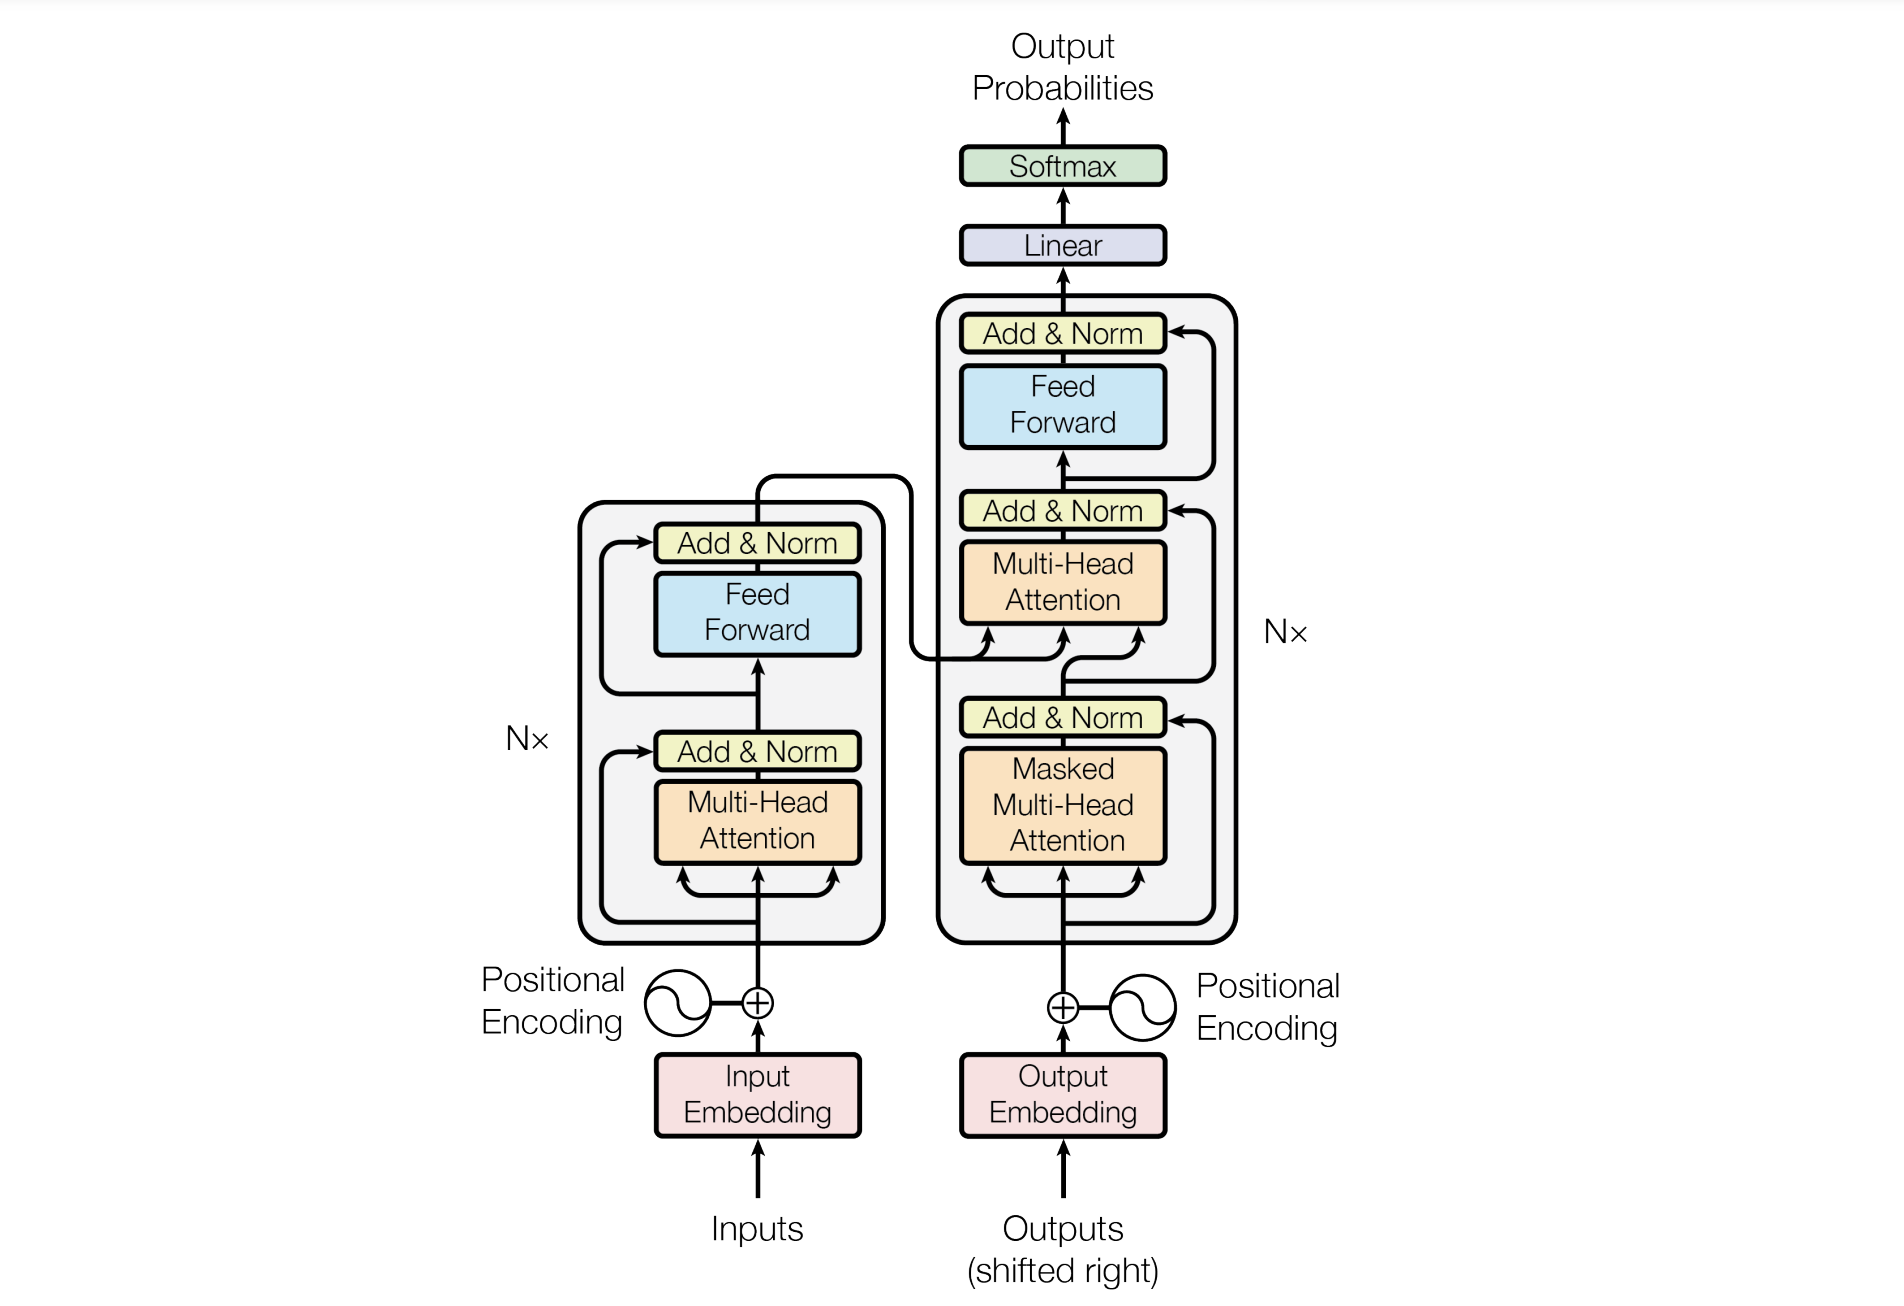

---

## 3.1 Transformer by Example -- Inference

Before we start, let's explain how transformer works by way of an example. The `inputs` and `outputs` are batches of tokens that are already encoded (such as using byte-pair encoding) from the original text, say, "it is a beautiful day!", and we are using the transformer to translate to French "c'est une belle journée":

```
it is a beautiful day! --> c'est une belle journée!
```

The first half is called the source (or `input` in the diagram), and the second half is called the target (or `output` in the diagram).

As we mentioned before, the transformer is designed to handle a batch of input/output pairs at the same time, which is important for training. So we're looking at something like this:


```
it is a beautiful day! --> c'est une belle journée!
do you like flowers?   --> aimes-tu les fleurs?
```

And their encodings could be:

```
[32, 12, 84, 34, 108, 15, 77, 1] --> [201, 104, 154, 123, 75, 1]
[10, 14, 17, 92, 44, 1]          --> [107, 34, 55, 678, 23, 54, 97, 65, 1]
```

Here, we are going to use `1` to represent the start-of-sentence token (`<s>`), and `2` to represent the end-of-sentence token (`</s>`). This is an arbitrary decision and part of whatever the scheme the researchers chose to use.

Moreover, we want the sentences to be padded with `0` to represent the padding token, so all source sequences have the same length (9 in our case), and all target sequences have the same length (10 in our case):


```
[2, 32, 12, 84, 34, 108, 15, 77, 1] --> [2, 201, 104, 154, 123, 75, 1, 0, 0, 0]
[2, 10, 14, 17, 92, 44, 1, 0, 0]    --> [2, 107, 34, 55, 678, 23, 54, 97, 65, 1]
```

Now, it is clear the input is a tensor with shape `[B, Ls]`, and the output is a tensor with shape
`[B, Lt]`, where `Ls` and `Lt` are the lengths of the source and target sequences. `Ls` and `Lt` don't need to be
the same, but both must be no larger than `maxL`, which is used in the positional encoding modules -- this is just so that we can pre-build the positional encoder once and for all in the constructor.

Now let's look at the two halves of the transformer separately. The left half is the encoder stack, and the right half is the decoder stack. The job of the encoder stack is to encode the input sequences into an embedding representation and repeatedly transform it. You should be familiar with the notion of embedding, which is nothing but a `D`-dimensional vector. If you look at it from the perspective of how the input tensor flows through
the stack, it looks like this:

```
[B, Ls] --> [B, Ls, D] --> [B, Ls, D] --> ... --> [B, Ls, D]
```

Let's say we choose the embedding dimension to be 4, and there are 5 encoders on the stack (i.e. `Nx = 5`), the sequence for our example would be:

```
[2, 9] --> [2, 9, 4] --> [2, 9, 4] --> [2, 9, 4] --> [2, 9, 4] --> [2, 9, 4] --> [2, 9, 4]
source     initial       encoder #1    encoder #2    encoder #3    encoder #4    encoder #5
           embedding                                                             ==========
                                                                                 final encoder output
```

Note that after the initial embedding, the tensor of shape `[B, Lt, D]` got repeatedly "transformed" to soak in more contextual information. You can think of the output of the last encoder to be the final words of the encoder stack. This will be passed to the decoder via the arrow depicted in the diagram. Let this tensor be called `C`
(of shape `[B, Ls, D]`).

At inference time, we are asked to predict one token at a time. What does this mean?

Let's now look at the decoder stack, which is the right side of the transformer architecture depicted in the
diagram. We are going to predict one token at a time, given the start token `<s>` and the context `C` which is the output of the encoder stack, and it encapsulates all the information from the source sentence in a highly
usable way. Note that `C` (again, with shape `[B, Ls, D]`) will remain unchanged throughout the decoding process. Let's consider the first example, `it is a beautiful day!`. Conceptually, we want to do this:

```
    "C" + <s>                          --> c'est
                                           -----
    "C" + <s> c'est                    --> c'est une
                                                 ---
    "C" + <s> c'est une                --> c'est une belle
                                                     -----
    "C" + <s> c'est une belle          --> c'est une belle jour
                                                           ----
    "C" + <s> c'est une belle jour     --> c'est une belle journée
                                                               ---
    "C" + <s> c'est une belle journée  --> c'est une belle journée!
                                                                  -
    "C" + <s> c'est une belle journée! --> c'est une belle journée! </s>
                                                                    ----
=======   ============================
  final   target
encoder   tensor
 tensor
```

Of course, in reality we are working with the target tensor of numbers whose shape is `[B, Lt, D]` instead of English or French words, but the idea is the same.

Starting with a target tensor with only the `<s>` token, we compute the next output token, and then expand the target tensor (depicted as `Outputs (shifted right)` in the diagram) and repeat the process. When do we stop? When the next output token generated is `</s>`, or when the target tensor grows to `maxL` (in which case we run out of
room and cannot continue). In our example, we terminate after 7 passes, and then you pad the output with the
padding token `0`.

Like the encoder, the decoder repeatedly "transforms" the tensor during each pass.

```
[B, Lt] --> [B, Lt, D] --> [B, Lt, D] --> ... --> [B, Lt, D]
```

In our example,

```
[2, 10] --> [2, 10, 4] --> [2, 10, 4] --> [2, 10, 4] --> [2, 10, 4] --> [2, 10, 4] --> [2, 10, 4]
target      initial        decoder #1     decoder #2     decoder #3     decoder #4     decoder #5
            embedding                                                                  ==========
                                                                                       final decoder output
```

Note that the final decoder output is a tensor of shape `[B, Lt, D]`. How does this turn into the next token?

Well, it turns out there are two more modules, a linear module and a softmax module, to turn the embeddings to actual probabilities:

```
[B, Lt, D] --> linear --> [B, Lt, Vt] --> softmax --> [B, Lt, Vt]
                                                      ===========
                                                      probabilities
```

Let's focus on one translation, from "it is a beautiful day!" to "c'est une belle journée!"
The output of the decoder stack is actually a tensor of shape `[Lt, D]`. Think of it as an embedding for
each of the output tokens. Each of the output token is represented by a `D`-dimensional embedding.
The job of the linear module is to compute an unnormalized score for each word in the vocabulary.

For example, let's say the embedding for the first output token is `[0.23, 0.43, 0.12, -0.14]` (we
assume `D = 4`). Then, the linear module, which is fully connected, provides a score for each of the `Vt`
words in the vocabulary (for example, `Vt` could be 30000).

```
[0.27, 0.09, 0.01, -1.02, 5.43, ..., 0.73]  # a total of Vt dimensions
```

Then, we'll perform a softmax, which converts the unnormalized score into normalized probabilities:


```
    [0.27, 0.09, 0.01, -1.02, 5.43, ..., 0.73]   # unnormalized scores (Vt dimensions)
--> [0.02, 0.01, 0.004,  0.001, 0.77, ..., 0.12] # normalized probabilities (Vt dimensions)
```

In the simplest scheme, we would then pick out the index with the highest probability, which in this
case is 0.77, at index 201, corresponding to the entry for `c'est`. That's it!

In summary, for inference, we start by computing the context tensor `C` (of shape `[B, Ls, D]`)
computed by decoding the source sequences, and then iteratively compute the target sequence, starting
with the `<s>` token, and compute the next tokens one at a time.

---

## 3.2 Transformer by Example -- Training

Transformer inference is done one-token at a time, so if you have 1000 tokens in the sentence, we will generate each one of the 1000 tokens one after the another.

Training, on the other hand, is done in a single pass! This is actually quite amazing.

A key innovation (which pre-dated transformer) is "teacher forcing". While we are still trying to predict the next token, once it is predicted, regardless of the prediction, we'll discard it and use the next correct token for the next prediction.

Let's consider the `it is a beautiful day!` example. Let's say the first word predicted
is `c'est` which is correct, but the next word is incorrectly predicted as `fleurs` instead of the correct
answer `une`. For inference, we have no choice but to use `<s> c'est fleurs` to predict the next word, which can lead to some unexpectedly weird translation, and in fact may diverge greatly from what we expect.

Instead, during training, we shall use `<s> c'est une` to predict the next token even though we mistakenly predicted `<s> c'est fleurs`. This is teacher forcing, and allows us to train in a more manageble way.

Moreover, with teacher forcing, you can just give the whole answer to the student ahead of time, and just ask her not to peek ahead!

```
    "C" + <s> c'est une belle journée! --> c'est une belle journée! </s>
          ===                              -----
    "C" + <s> c'est une belle journée! --> c'est une belle journée! </s>
          =========                              ---
    "C" + <s> c'est une belle journée! --> c'est une belle journée! </s>
          =============                              -----
    "C" + <s> c'est une belle journée! --> c'est une belle journée! </s>
          ===================                              ----
    "C" + <s> c'est une belle journée! --> c'est une belle journée! </s>
          ========================                             ---
    "C" + <s> c'est une belle journée! --> c'est une belle journée! </s>
          ===========================                             -
    "C" + <s> c'est une belle journée! --> c'est une belle journée! </s>
          ============================                              ----
```

Think of it as you need to predict a total of `Lt` tokens (7 in this case). To predict the first token,
you are only allowed to see the context `C` and the first source token (`<s>`).

To predict the second token, you are only allowed to see the context `C` and the first two source tokens
(`<s> c'est`).

To predict the third token, you are only allowed to see the context `C` and the first three source tokens
(`<s> c'est une belle`).

And so on.

Unlike inference where we keep updating the target tensor as we get new predictions, during training,
the source and target tensors are known and unchanged throughout! The only requirement is that when we
are predicting the `kth` token, we are only allowed to look at the first `k` target tokens, and the entire
context tensor `C` (which fully captures the source tensor). This essentially is identical to seeing the
correction of what have been predicted so far.

Teacher forcing allows for the clever trick of concurrent prediction of all tokens simultaneously, and
this is done with masking, which we'll talk about during the implementation.

---

## 3.3 The Attention Mechanism

The attention mechanism ("multi-head attention") is the key mathematical concept that allow for the transformation of the tensors. The attention mechanism shows up three times in the diagram depiction, once in the encoder
on the left, and twice in the decoder on the right. The bottom two of them are self-attentions, and the upper one is a cross-attention.

Conceptually, for the attention mechanism to work, there is a query tensor (`Q`), a
key tensor (`K`), and a value tensor (`V`). This is analogous to search query retrieval -- you search for something with a query (question), and the query is matched with the index or key of the documents, and finally you retrieve the content of the documents.

The self-attention, where `Q`, `K`, and `V` are the exact same thing, is used in both the encoder and decoder. What is it? Think of it as a kind of collective
group introspection. You have a tensor of a certain length, say `L`. Think of each element as a person, and together they form a group. Each person is making up a query based on themelves, and each person is also making up a key based on themselves. Then everyone is asking everyone else if they are a match by comparing the query and the key, measured in the form of a score. The scores are then normalized, and then each person becomes the weighted average of the values of the people they matched, weighting by the normalized scores.

Self-attention is made infinitely more interesting when the query, key, and value are not the tensor per-se, but a trainable transformation of the embedding. For example, say each "person" is embedded in 4 dimensions:

```
[0.3, 0.4, 0.2, -0.9]
```

We would have three fully-connected, trainable `4-by-4` transformations to take the embedding to the query, key, and value:


```
[0.3, 0.4, 0.2, -0.9] --> W_q --> [0.2, 0.7, 0.3, -0.5]  # query
[0.3, 0.4, 0.2, -0.9] --> W_k --> [0.1, -0.2, 0.0, 0.3]  # key
[0.3, 0.4, 0.2, -0.9] --> W_v --> [0.7, 0.4, -0.1, 0.8]  # value
```

It may be instructive to think of the self-attention module as a kind of inner "enlightenment" within itself -- improving and enriching each individual based on the context of the entire group.

Cross-attention, which follows self-attention in the decoder module, works similarly. In fact, the mathematics
are the same, but the inputs are different. Instead of using the same tensor as `Q`, `K`, and `V`, notice `Q` is from the target tensor, and `K` and `V` are the source context tensor (the very last one). What is going on?

Think of this as a cross-group matching, like dating. Think of the target tensor as a group of girls (there are `Lt` of them), and the source tensor as a group of guys (there are `Ls` of them). Note that this is for illustrative purpose only, reversing the gender works just as well.

Each of the `Lt` girls in the first group makes up a query, and each of the `Ls` guys in the second group provides an index and his value. Then they match, and extract the values. At the end, the output of the cross-attention is the weighted average of the values of the guys based on how well the queries made by the girls match the indices made by the guys. Like in the case of self-attention, we don't use the embeddings straight up, but a trainable transformations of the embeddings with `W_q`, `W_k`, and `W_v`, which are trainable modules.

Moreover, the output of the cross attention has the same dimension as that of the query. We start with a tensor of shape `[B, Lt, D]`, and end with a tensor of shape `[B, Lt, D]`.

This is the end of the tutorial. Now let's start coding.